# Uncertainty estimation

### Confidence intervals for model parameters

We will focus on simple linear regression using artificial data, just for visual purposes.

For instance we can consider the following example. The owner of a shop assumes that the amount of customers visiting the shop is enough to predict the amount of units of certain product that will be sold. We create artificial data for the amount of visitors (x) and the sales (y).

In [1]:
import numpy as np


# random number seed
np.random.seed(0)
# Number of samples
size = 100
x = 20 * (2.5 + np.random.randn(size)) 
y = x + (10 * np.random.randn(size) + 50)

Let us see how the data looks like.

Text(0, 0.5, 'Sales')

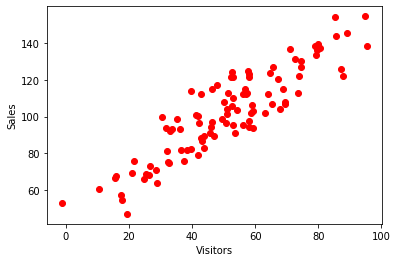

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, y,'ro')
plt.xlabel('Visitors')
plt.ylabel('Sales')


We use bootstrapping to create $k = 1000$ models

In [3]:
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression

coefficients = []
intercepts = []
for _ in range(1000):
    idx = np.random.randint(0, size, size).reshape(-1, 1)
    #print(idx.shape)
    x_train = x[idx]
    y_train = y[idx]
    # models training
    model = LinearRegression().fit(x_train, y_train)
    # storing coefficients
    coefficients.append(model.coef_.item())
    intercepts.append(model.intercept_)
intercepts = np.array(intercepts).reshape([1000,])

We calculate the limits, cutting tails by percentiles calculation.

In [4]:
upper_coefficient = np.percentile(coefficients, 97.5)
upper_intercept = np.percentile(intercepts, 97.5)
lower_coefficient = np.percentile(coefficients, 2.5)
lower_intercept = np.percentile(intercepts, 2.5)

We plot histograms for both parameters.

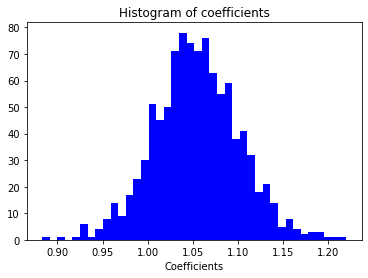

In [5]:
plt.hist(coefficients, 40, facecolor='b');
plt.xlabel('Coefficients')
plt.title('Histogram of coefficients')
plt.show()

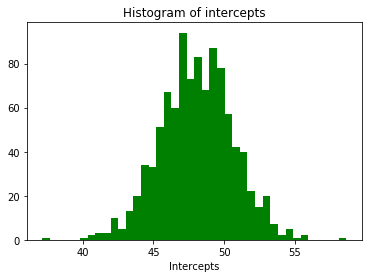

In [6]:
plt.hist(intercepts, 40, facecolor='g');
plt.xlabel('Intercepts')
plt.title('Histogram of intercepts')
plt.show()

The confidence interval for the coefficient ($b$) with 95% precision is 

In [7]:
print([lower_coefficient, upper_coefficient])

[0.960541832476306, 1.1489550620729876]


The confidence interval for the intercept ($a$) with 95% precision is 

In [8]:
print([lower_intercept, upper_intercept])

[43.08637886084862, 53.07706641672887]


### Prediction intervals

We will see graphically the shape of prediction intervals and its interpretation, using the same example we have used before.

We create the same data again

In [9]:
import numpy as np


# random number seed
np.random.seed(0)
# Number of samples
size = 100
x = 20 * (2.5 + np.random.randn(size)) 
y = x + (10 * np.random.randn(size) + 50)

We train the model and calculate the necessary statistics

In [10]:
from sklearn.linear_model import LinearRegression

# model training
model = LinearRegression().fit(x.reshape(-1,1), y.reshape(-1,1))
# make predictions
yhat = model.predict(x.reshape(-1,1))
# estimate stdev of yhat
sum_errs = np.sum((y - yhat)**2)
stdev = np.sqrt(1/(len(y)-2) * sum_errs)
# calculate prediction interval
interval = 1.96 * stdev

The regression line is

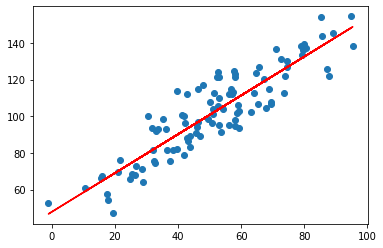

In [11]:
plt.scatter(x, y)
plt.plot(x, yhat, color='red')
plt.show()

Now that we have the model, we get a single values for calculating their prediction intervals. 

First, we take a point in the upper side. For instance, the forth sample in x has a real value $y= 154.51$

In [12]:
y[3]

154.51183106560927

We get its prediction interval

In [13]:
# define new input, expected value and prediction
# extreme value (high)
x1_in = x[3]
y1_out = y[3]
y1hat_out = yhat[3]

Prediction Interval: 630.548
95% likelihood that the true value is between -476.036 and 785.060
True value: 148.140


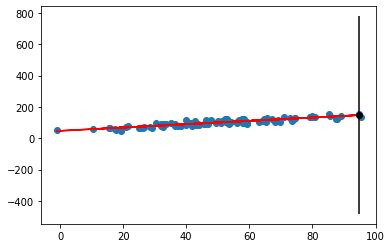

In [14]:
print('Prediction Interval: %.3f' % interval)
lower1, upper1 = y1_out - interval, y1_out + interval
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower1, upper1))
print('True value: %.3f' % y1hat_out)
# plot dataset and prediction with interval
plt.scatter(x, y)
plt.plot(x, yhat, color='red')
plt.errorbar(x1_in, y1hat_out, yerr=interval, color='black', fmt='o')
plt.show()

Secondly, we take a value on the lower tail. For instance, the 21st sample in x has a real value $y= 52.70$

In [15]:
y[20]

52.70445899487473

In [16]:
# define new input, expected value and prediction
# extreme value (low)
x2_in = x[20]
y2_out = y[20]
y2hat_out = yhat[20]


Prediction Interval: 630.548
95% likelihood that the true value is between -577.844 and 683.252
True value: 46.763


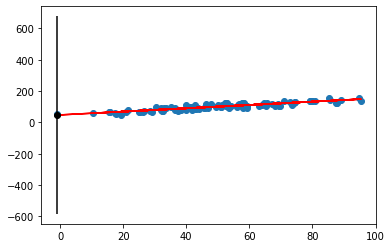

In [17]:
print('Prediction Interval: %.3f' % interval)
lower2, upper2 = y2_out - interval, y2_out + interval
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower2, upper2))
print('True value: %.3f' % y2hat_out)
# plot dataset and prediction with interval
plt.scatter(x, y)
plt.plot(x, yhat, color='red')
plt.errorbar(x2_in, y2hat_out, yerr=interval, color='black', fmt='o')
plt.show()

Last, we take the point that is closest to the mean value ($102.01$). Concretely, the 22nd sample, with $y=102.08$

In [18]:
y[21]

102.07836400296526

In [19]:
# define new input, expected value and prediction
# closest to the average value
x3_in = x[21]
y3_out = y[21]
y3hat_out = yhat[21]

Prediction Interval: 630.548
95% likelihood that the true value is between -528.470 and 732.626
True value: 114.574


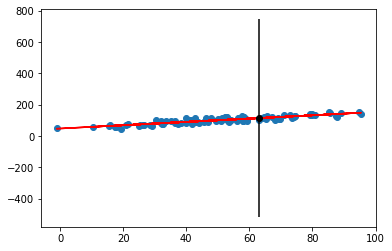

In [20]:
print('Prediction Interval: %.3f' % interval)
lower3, upper3 = y3_out - interval, y3_out + interval
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower3, upper3))
print('True value: %.3f' % y3hat_out)
# plot dataset and prediction with interval
plt.scatter(x, y)
plt.plot(x, yhat, color='red')
plt.errorbar(x3_in, y3hat_out, yerr=interval, color='black', fmt='o')
plt.show()

With this random data, the amount of information is so spread that we have a lot of uncertainty everywhere.

A confidence interval for the standard error would have been wider in the tails, but narrower in the central part, as it is more densely represented by data.